# 线性模型
线性模型利用输入特征的**线性函数（linear function）**进行预测。

In [1]:
import sys
print("Python version:{}".format(sys.version))

import pandas as pd
print("pandas version:{}".format(pd.__version__))

import matplotlib
print("matplotlib version:{}".format(matplotlib.__version__))
import matplotlib.pyplot as plt

import numpy as np
print("Numpy version:{}".format(np.__version__))

import scipy as sp
print("Scipy version:{}".format(sp.__version__))

import IPython
print("IPython version:{}".format(IPython.__version__))

import sklearn
print("scikit-learn version:{}".format(sklearn.__version__))

import mglearn

Python version:3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version:0.23.4
matplotlib version:3.0.2
Numpy version:1.15.4
Scipy version:1.1.0
IPython version:7.2.0
scikit-learn version:0.20.1


w[0]: 0.393906  b: -0.031804


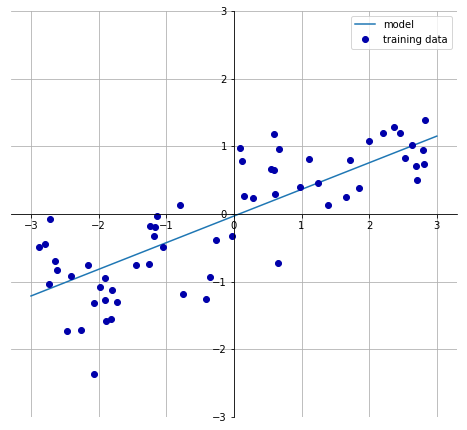

In [2]:
mglearn.plots.plot_linear_regression_wave()

线性模型预测的一般公式如下：  
y^=w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b

用于回归的线性模型可以表示为这样的回归模型：对单一特征的预测结果是一条直线，两个特征时是一个平面，或者在更高维度（即更多特征）时是一个超平面。如果特征数量大于训练数据点的数量，任何目标y都可以（在训练集上）用线性函数完美拟合。

# 线性回归（又名普通最小二乘法）
线性回归，或者**普通最小二乘法（ordinary least squares,OLS）**,是回归问题最简单也最经典的线性方法。线性回归寻找参数w和b,使得对于训练集的预测值与真实的回归目标值y之间的**均方误差**最小。**均方误差（mean squared error）**是预测值与真实值之间的平方和除以样本数。

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)

“斜率”参数（w,也叫作权重或系数）被保存在coef_属性中，而偏移或截距（b）被保存在intercept_属性中。

In [4]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.03180434302675973


intercept_属性是一个浮点数，而coef_属性是一个Numpy数组，每个元素对应一个输入特征。由于wave数据集中只有一个输入特征，所以lr.coef_中只有一个元素。

In [5]:
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score:0.67
Test set score:0.66


R2约为0.66，这个结果不是很好，但我们可以看到，训练集和测试集上的分数非常接近。这说明可能存在欠拟合，而不是过拟合。对于这个一维数据集来说，过拟合的
风险很小，因为模型非常简单（或受限）。然而，对于更高维的数据集（即有大量特征的数据集），线性模型将变得非常强大，过拟合的可能性也会很大。

In [6]:
X,y=mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score:0.95
Test set score:0.61


比较一下训练集和测试集的分数就可以发现，我们在训练集上的预测非常准确，但测试上的R2要低很多。  
训练集和测试集之间的性能差异是过拟合的明显标志，因此我们应该试图找到一个可以控制复杂度的模型。  
标准线性胡桂最常用的替代方法之一就是岭回归（ridge regerssion）。

# 岭回归
岭回归也是一种用于回归的线性模型，因此它的预测公式与普通最小二乘法相同。但在岭回归中，对系数（w）的选择不仅要在训练数据上得到好的预测结果，而且还要拟合附加约束。我们还希望系数尽量小。换句话说，w的所有元素都应该接近于0。直观上来看，这意味着每个特征对输出的影响应尽可能小（即斜率很小），同时仍给出很好的预测结果。这种约束是所谓**正则化（regularization）**的一个例子。正则化是指对模型做显示约束，以避免过拟合。岭回归用到的这种被称为L2正则化。

In [7]:
from sklearn.linear_model import Ridge

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
ridge=Ridge().fit(X_train,y_train)

print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test,y_test)))

Training set score:0.89
Test set score:0.75


可以看出，Ridge在训练集上的分数要低于LinearRegression,但在测试集上的分数更高。这和我们的预期一致。线性胡桂对数据存在过拟合。Ridge是一种约束更强的模型，所以更不容易过拟合。复杂度凶的模型意味着在训练集上的性能更差，但泛化性能更好。由于我们只对泛化性能感兴趣，所以应该选择Ridge模型而不是LinearRegression模型。  
Ridge模型还可以通过alpha参数控制模型的简单性。

In [8]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test,y_test)))

Training set score:0.79
Test set score:0.64


In [9]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test,y_test)))

Training set score:0.93
Test set score:0.77


## alpha与模型参数的关系

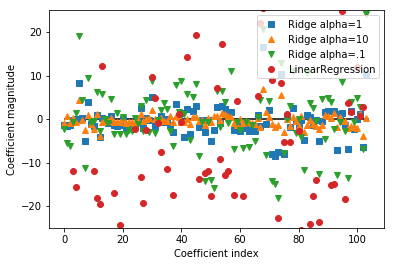

In [10]:
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(loc=1)

上图的x轴对应coef_的元素：x=0对应第一个特征的系数，x=1对应第二个特征的系数，以此类推，一直到x=100。y轴表示该系数的具体数值。这里需要记住的是，对于alpha=10,系数大多在-3和3之间。对于alpha=1的Ridge模型，系数要稍大一点。对于alpha=0.1,点的范围更大。对于没有做正则化的线性回归（即alpha=0）,点的范围很大，许多点都超出了图像的范围。

# lassso
与岭回归系统，使用lasso也是约束系数使其接近于0，但用到的方法不同，叫作L1正则化。L1正则化的结果是，使用lasso时某些系数刚好为0。这说明某些特征被模型完全忽略。这可以看作是一种自动化的特征选择。某些系数刚好为0，这样模型更容易解释，也可以呈现模型最重要的特征。

In [11]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso.coef_!=0)))

Training set score:0.29
Test set score:0.21
Number of features used:4


如你所见，Lasso在训练集和测试集上的表现都很差。这表示存在欠拟合，我们发现模型只用到了105个特征中的4个。与Ridge类似，Lasso也有一个正则化参数alpha,可以控制系数趋于0的强度。在上一个例子中，我们用到的默认值alpha=1.0。为了降低欠拟合，我们尝试减小alpha。这么做的同时，我们还需要增加max_iter的值（运行迭代的最大次数）：

In [12]:
# 我们增大max_iter的值，否则模型会警告我们，说应该增大max_iter
lasso001=Lasso(alpha=0.01,max_iter=10000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso001.coef_!=0)))

Training set score:0.90
Test set score:0.77
Number of features used:33


alpha值变小，我们可以拟合一个更复杂的模型，在训练集和测试集上的表现也更好。模型性能比使用Ridge时略好一点，而且我们只用到了105个特征中的33个。主要模型可能更容易理解。  
但如果把alpha设的太小，那么就会消除正则化的效果，并出现过拟合，得到与LinearRegression类似的结果：

In [13]:
lasso00001=Lasso(alpha=0.0001,max_iter=10000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso00001.coef_!=0)))

Training set score:0.95
Test set score:0.65
Number of features used:97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-25, 25)

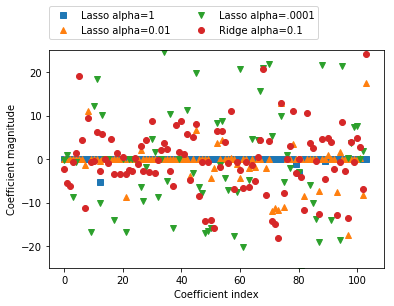

In [14]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)

在alpha=1时，我们发现大部分系数都是0，而且其他系数也很小。将alpha减小至0.01，我们得到图中向上的三角形，大部分特征等于0。alpha=0.0001时，我们得到正则化很弱的模型，大部分系数都不为0，并且还很大。为了便于比较，图中用圆形表示Ridge的最佳结果。alpha=0.1的Ridge模型的预测性能与alpha=0.01的Lasso模型类似，但Ridge模型的所有系数都不为0。

# 结论
在实践中，在两个模型中一般首选岭回归。但如果特征很多，你认为只有其中几个是重要的，那么选择Lasso可能更好。同样，如果你想要一个容易解释的模型，Lasso可以给出更容易理解的模型，因为它选择了一部分输入特征。scikit-learn还提供了ElasticNet类，结合了Lasso和Ridge的惩罚项。在实践中，这种结合的效果最好，不过代价是要调节两个参数：一个用于L1正则化，一个用于L2正则化。